In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df=pd.read_csv("HealthInsurance.csv", index_col=None, header=0)

# Data pre-processing

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
#To understand the metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#To understand the numeric variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#To check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#Converting the categorical variables into numeric variables
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
#To convert sex variable into a numeric variable
#creating a dictionary for sex variable
sex_dict={"male":0,"female":1}

In [11]:
df["sex"]=df["sex"].map(sex_dict)

In [12]:
df["sex"].value_counts()

0    676
1    662
Name: sex, dtype: int64

In [13]:
#Converting the categorical variables into numeric variables
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
#To convert smoker variable into a numeric variable
#Creating a dictionary for smoker variable
smoker_dict={"no":0,"yes":1}

In [15]:
df["smoker"]=df["smoker"].map(smoker_dict)

In [16]:
df["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [17]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [18]:
#To covert region variable into a numeric variable
#Creating a dictionary for region variable
region_dict={"southeast":0,"southwest":1,"northwest":2,"northeast":3}

In [19]:
df["region"]=df["region"].map(region_dict)

In [20]:
df["region"].value_counts()

0    364
2    325
1    325
3    324
Name: region, dtype: int64

# LINEAR REGRESSION

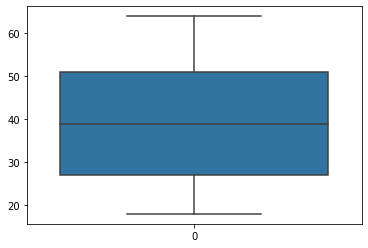

In [21]:
#ASSUMPTION 1-->There should be no outliers in the data
#Never run a box plot on discrete variables only run on continuous variables
sns.boxplot(data=df.age)

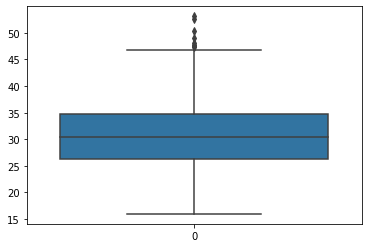

In [22]:
sns.boxplot(data=df.bmi)

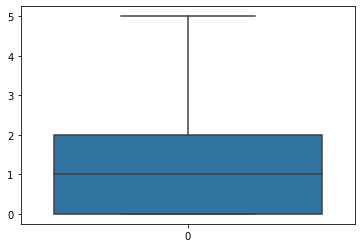

In [23]:
sns.boxplot(data=df.children)

In [24]:
'''There are a cluster of outliers present in bmi variable, which wont be imputed since they are 
considered as just far values from the other values'''

'There are a cluster of outliers present in bmi variable, which wont be imputed since they are \nconsidered as just far values from the other values'

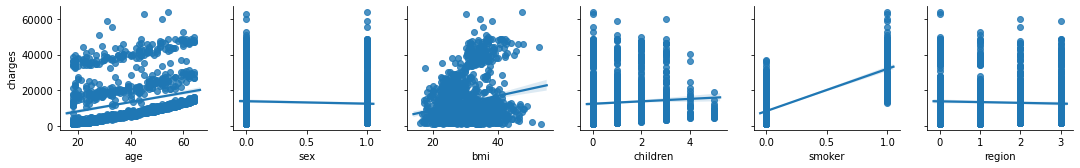

In [25]:
#ASSUMPTION 2-->Linearity Assumption
#Every independant variable must have a Linear Relationship with the dependant variable
#This can be checked using pairplot
sns.pairplot(df,x_vars=["age","sex","bmi","children","smoker","region"],y_vars="charges",kind="reg")

In [26]:
#Segregating independent & depent variable
#here include only those variables that show linear relationship
X=df[["age","sex","bmi","children","smoker","region"]]
Y=df["charges"]

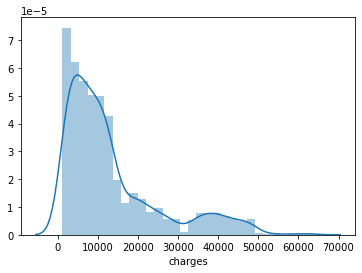

In [27]:
#ASSUMPTION 3-->Normality Assumption
#the dependant variable must follow approximately a normal distribution
#This can be checked using distplot(), gives a histogram
sns.distplot(Y,hist=True)

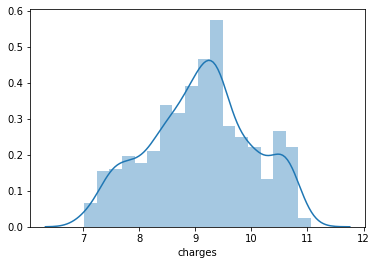

In [28]:
#here we can see that it does not follow a normal distribution, so we perform log transformation & check
#log transform
Y_log=np.log(Y)
sns.distplot(Y_log,hist="True")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227DA766448>,
      dtype=object)

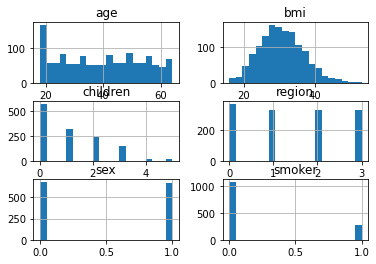

In [29]:
##Checking skewness in independent variable is a good practise
##If found skewness perform log transform
##Donot perform any transformation multiple times 
X.hist(bins=20)

In [30]:
#Some skewness is acceptable , generic code to handle this is given below
#X.apply applies function to all the variables individually 
##We perform log1p transformation since there might be some values with value 0 performin normal log transf can covert these values to negative infinity therefore we we perform log1 transform which converts 0 to 1 and then performs log on it
from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)] ## Finding outlier beyonf 0.75 and -0.75 in any variable and is stored in new variable data_num_skewed 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index]) ##

age         0.055610
sex         0.020928
bmi         0.283729
children    0.937328
smoker      1.463124
region      0.049170
dtype: float64
children    0.937328
smoker      1.463124
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227DB1E1A48>,
      dtype=object)

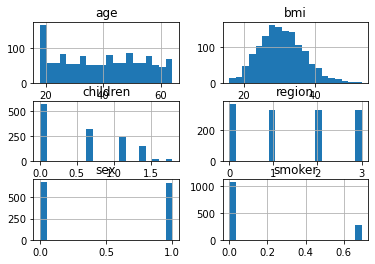

In [31]:
X.hist(bins=20)

               age       sex       bmi  children    smoker    region
age       1.000000  0.020856  0.109272  0.048406 -0.025019  0.006308
sex       0.020856  1.000000 -0.046371 -0.016296 -0.076185  0.012816
bmi       0.109272 -0.046371  1.000000  0.016178  0.003750 -0.262754
children  0.048406 -0.016296  0.016178  1.000000  0.013245 -0.000860
smoker   -0.025019 -0.076185  0.003750  0.013245  1.000000 -0.038873
region    0.006308  0.012816 -0.262754 -0.000860 -0.038873  1.000000


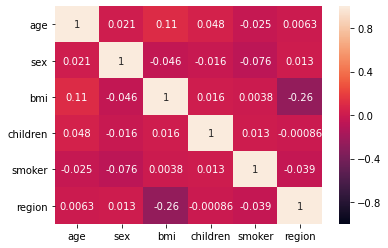

In [32]:
##ASSUMPTION 4--->There should be no Multicolinearity
#To check multicolinearity among independent variable
corr_df=X.corr(method="pearson")
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True) ##Heatmaqp represents the corr in colorfull effect

In [33]:
##VIF 
#stasmodel to run statistical model
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,age,7.98
1,sex,1.92
2,bmi,8.82
3,children,2.05
4,smoker,1.25
5,region,2.37


# Model Building

In [34]:
X=df[["age","sex","bmi","children","smoker","region"]]
Y=df["charges"]

#Splitting the data using sklearn
from sklearn.model_selection import train_test_split
#splitting the data into train & test
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=10)


In [35]:
#Creating the Model object
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)


-13852.855289383382
[  259.58768613   253.19052641   352.58760017   544.10213435
 24123.55372986   310.61294595]


In [36]:
print(list(zip(X.columns,lm.coef_)))

[('age', 259.5876861309531), ('sex', 253.19052640527957), ('bmi', 352.58760017183505), ('children', 544.10213435281), ('smoker', 24123.553729855845), ('region', 310.6129459478075)]


In [37]:
#Predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 8039.39194759  5846.03546025 15398.53323902 11078.08110332
  3727.45925919  9673.48007202  9120.50581845 25723.19601246
  7365.44834761 30773.8210225   1681.87178405  4230.68798522
  7419.10928456 11297.61749299 12997.90586567 11071.2652669
  5418.58205449 18477.07477271 10838.24133098 30973.0636082
 34222.11886782  4347.18131145  1283.09512374  7353.90920088
  4104.09199795 13390.85587603 12048.82008141 10241.65835874
  6606.92821696 31227.56236474 -1628.84182355 34239.7777003
  9290.54092238  7393.57253673  7949.05089346 11855.25511176
 13447.48689979 12896.28226168  9958.35512211  8628.72035974
 15747.2125296   9779.34365612  5477.58141807 11616.4279189
  5325.17693204  7077.86356137  6589.86297827 34330.58514603
 11103.57075443 10602.34349666 33043.46662743  5342.96589038
 10565.5077926  14697.56451463 10958.91334094 13113.18410203
 12227.48222132  7796.40746922  7799.47780724 34798.71813516
   728.44219919 33415.55483994 37011.95253766  1321.52499411
 27873.74811295 10063.043624

In [38]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual Charges"]=Y_test
new_df["Predicted Charges"]=Y_pred
print(new_df)

      age  sex     bmi  children  smoker  region  Actual Charges  \
7      37    1  27.740         3       0       2      7281.50560   
999    36    1  26.885         0       0       2      5267.81815   
1209   59    0  37.100         1       0       1     12347.17200   
491    61    1  25.080         0       0       0     24513.09126   
625    29    1  26.030         0       0       2      3736.46470   
228    41    1  31.635         1       0       3      7358.17565   
425    45    0  24.310         5       0       0      9788.86590   
261    20    1  26.840         1       1       0     17085.26760   
498    44    1  23.980         2       0       0      8211.10020   
896    43    1  20.045         2       1       3     19798.05455   
507    21    0  23.750         2       0       2      3077.09550   
125    26    1  28.785         0       0       3      3385.39915   
501    43    0  26.030         0       0       3      6837.36870   
179    41    1  33.155         3       0       3

In [39]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.6953067620943834
6537.0818583559
0.6939332388581447


In [40]:
##Comparing the error with range of y  
##
print(min(Y_test))
print(max(Y_test))

1121.8739
62592.87309


# Tunning the model-Using feature selection

In [41]:
#df=df.drop(["region"] ,axis=1)
#df.shape

In [42]:
#Removing region from the df
X=df[["age","sex","bmi","children","smoker",]]
Y=df["charges"]

#Splitting the data using sklearn
from sklearn.model_selection import train_test_split
#splitting the data into train & test
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=10)

In [43]:
#Creating the Model object
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)


-12962.052840467362
[  259.86118981   245.97030517   338.54702203   542.26451254
 24083.33488137]


In [44]:
print(list(zip(X.columns,lm.coef_)))

[('age', 259.86118981072326), ('sex', 245.97030517270466), ('bmi', 338.54702202904923), ('children', 542.2645125354302), ('smoker', 24083.334881365157)]


In [45]:
#Predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 7916.86941639  5740.75698514 15472.11638818 11626.20935565
  3632.27095263  9190.42580137  9673.10136922 26193.34272608
  7920.6964297  30411.98758957  1620.05294382  3785.38442889
  7024.35730481 10789.54629992 12456.74264922 11012.56652782
  5829.92500128 18510.16713197 11044.6230933  30506.32967898
 33710.88804572  4121.20789543   870.28376599  6931.39174567
  4619.44135847 13229.17680415 12116.46305355 10211.81981505
  6703.14557825 31379.01367947 -1321.45919789 34291.10734621
  9740.08083649  7050.10686889  8299.20721439 12136.21606789
 13312.52252911 12975.40473816  9539.62347796  8832.55693987
 16130.63018455  9702.78088891  5386.97534712 11068.00518
  5643.2730624   7603.51298601  6290.40494591 33822.8616988
 10731.86880248 10519.87520915 32359.20941599  5769.32267879
 10682.99985593 14214.65447487 11424.03936011 13577.40922344
 11759.44118545  7949.89456778  7984.67468874 35191.1680828
   334.85575699 33605.81313064 36872.50595849  1841.49540663
 27784.84279674 10183.5774353

In [46]:
new_df1=pd.DataFrame()
new_df1=X_test

new_df1["Actual Charges"]=Y_test
new_df1["Predicted Charges"]=Y_pred
print(new_df1)

      age  sex     bmi  children  smoker  Actual Charges  Predicted Charges
7      37    1  27.740         3       0      7281.50560        7916.869416
999    36    1  26.885         0       0      5267.81815        5740.756985
1209   59    0  37.100         1       0     12347.17200       15472.116388
491    61    1  25.080         0       0     24513.09126       11626.209356
625    29    1  26.030         0       0      3736.46470        3632.270953
228    41    1  31.635         1       0      7358.17565        9190.425801
425    45    0  24.310         5       0      9788.86590        9673.101369
261    20    1  26.840         1       1     17085.26760       26193.342726
498    44    1  23.980         2       0      8211.10020        7920.696430
896    43    1  20.045         2       1     19798.05455       30411.987590
507    21    0  23.750         2       0      3077.09550        1620.052944
125    26    1  28.785         0       0      3385.39915        3785.384429
501    43   

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.6930233517708537
6561.53100381473
0.6918710370252488


In [48]:
##Comparing the error with range of y  
##
print(min(Y_test))
print(max(Y_test))

1121.8739
62592.87309


In [49]:
'''RMSE value is close to my mininum values, so its fine'''

'RMSE value is close to my mininum values, so its fine'

# Regularization-Ridge Regression

In [50]:
X=df[["age","sex","bmi","children","smoker","region"]]
Y=df["charges"]

#Splitting the data using sklearn
from sklearn.model_selection import train_test_split
#splitting the data into train & test
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=10)

In [51]:
##Tunning with ridge l2
##Lowers the beta paarameter of insignificat variables and reduces its impact
from sklearn.linear_model import Ridge
lm = Ridge()  #over writting lm 
lm.fit(X_train,Y_train)
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

'''-13852.855289383382
[  259.58768613   253.19052641   352.58760017   544.10213435
 24123.55372986   310.61294595]
'''

-13809.085970540948
[  259.52517468   242.86025816   352.49810697   543.0634198
 23983.39817414   307.94381183]


'-13852.855289383382\n[  259.58768613   253.19052641   352.58760017   544.10213435\n 24123.55372986   310.61294595]\n'

In [52]:
 ##Predicted values for ridge
Y_pred_new=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred_new)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

'''0.6953067620943834
6537.0818583559
0.6939332388581447'''

0.6957124160670165
6532.728830292117
0.6943407214737799


'0.6953067620943834\n6537.0818583559\n0.6939332388581447'

# Regularization-Lasso Regression

In [53]:
##Tunning with Lasso
##Correctly identifies the insignificant value
from sklearn.linear_model import Lasso
lm = Lasso()  #over writting lm 
lm.fit(X_train,Y_train)
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

'''-13852.855289383382
[  259.58768613   253.19052641   352.58760017   544.10213435
 24123.55372986   310.61294595]
'''

-13844.348035629684
[  259.59341405   248.65723485   352.49483807   543.37034354
 24116.74374922   309.61340878]


'-13852.855289383382\n[  259.58768613   253.19052641   352.58760017   544.10213435\n 24123.55372986   310.61294595]\n'

In [54]:
##Predicted values for Lasso
Y_pred_new=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred_new)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

'''0.6953067620943834
6537.0818583559
0.6939332388581447'''

0.6953364751615048
6536.763109096817
0.6939630858684687


'0.6953067620943834\n6537.0818583559\n0.6939332388581447'

In [55]:
new_df=pd.DataFrame()
new_df=X_train

new_df["charges"]=Y_train
new_df.shape

(1070, 7)

# STATS MODEL-ORDINARY LEAST SQUARE

In [56]:
#POST MB ASSUMPTION 1-->No Auto-correlation

import statsmodels.formula.api as sm


##default statsmodel has OLS
#Creating a fitted model with all three features
lm_model=sm.ols(formula="charges~age+sex+bmi+children+smoker+region",data=new_df).fit()
##ols gives all statistical outputs


#print the coeeficients
print(lm_model.params)
print(lm_model.summary())

Intercept   -13852.855289
age            259.587686
sex            253.190526
bmi            352.587600
children       544.102134
smoker       24123.553730
region         310.612946
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     572.4
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:58:33   Log-Likelihood:                -10812.
No. Observations:                1070   AIC:                         2.164e+04
Df Residuals:                    1063   BIC:                         2.167e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
             

In [57]:
#Removing the sex & region variable since its pvalue is >0.05
import statsmodels.formula.api as sm


##default statsmodel has OLS
#Creating a fitted model with all three features
lm_model=sm.ols(formula="charges~age+bmi+children+smoker",data=new_df).fit()
##ols gives all statistical outputs


#print the coeeficients
print(lm_model.params)
print(lm_model.summary())

Intercept   -12805.185619
age            260.299338
bmi            337.026914
children       541.489449
smoker       24058.099433
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     856.0
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:58:33   Log-Likelihood:                -10814.
No. Observations:                1070   AIC:                         2.164e+04
Df Residuals:                    1065   BIC:                         2.166e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.02

In [58]:
'''Even after excluding those variables, it makes no difference to the r2.
So we can conclude that these variable were insignificant but were not really causing problem to the dataset.'''

'Even after excluding those variables, it makes no difference to the r2.\nSo we can conclude that these variable were insignificant but were not really causing problem to the dataset.'

Text(0, 0.5, 'Residuals')

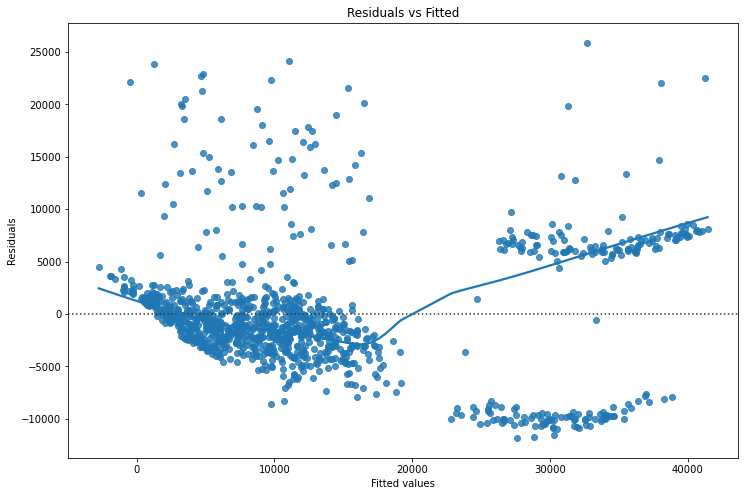

In [59]:
#POST MB ASSUMPTION-->
#Diagonostic 
##Errors should be random can be checked residual versus fitted plot

plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'charges', data=new_df, lowess=True)
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


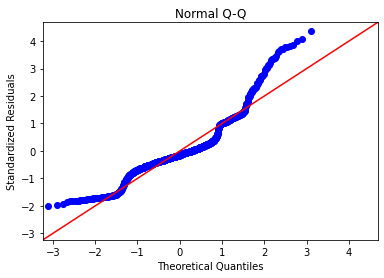

In [60]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

##Errors should follow an approximate normal distribution
##Can be checked using a normal quantile quantile plot
##Blue line should lie 

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

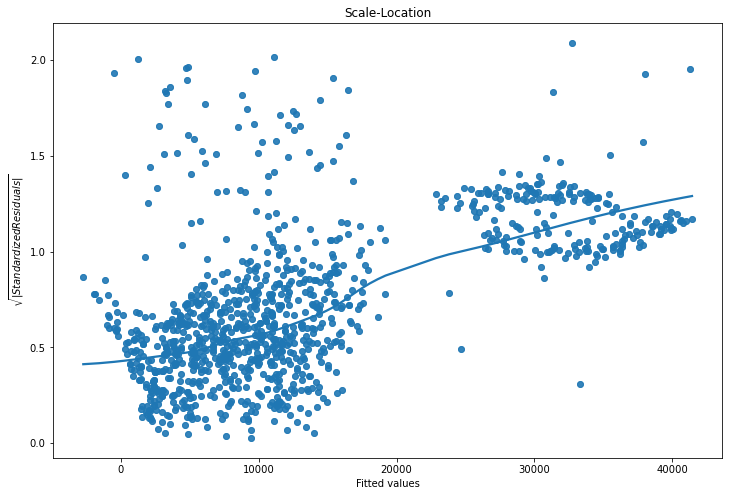

In [61]:
# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')


##Error should follow a constant variances
##values folow constants variance is called homoskedasticity
##values donot folow constants variance is called hetroskedasticity
##Can be checked using scale-location plot
##Variance should not follow steep structure(v-structure, this hetreskedasticity)
##Variance should be constant

# STOCHASTIC GRADIENT DESCENT REGRESSOR

In [62]:
#Scaling is performed only on X since it has multiple vars, whereas Y has only 1 var
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
#scaler.fit(X)
#X=scaler.transform(X)
print(X)

[[-1.43876426  1.0105187  -0.45332    -0.90861367  1.97058663 -0.40287427]
 [-1.50996545 -0.98959079  0.5096211  -0.07876719 -0.5074631  -1.28800691]
 [-0.79795355 -0.98959079  0.38330685  1.58092576 -0.5074631  -1.28800691]
 ...
 [-1.50996545  1.0105187   1.0148781  -0.90861367 -0.5074631  -1.28800691]
 [-1.29636188  1.0105187  -0.79781341 -0.90861367 -0.5074631  -0.40287427]
 [ 1.55168573  1.0105187  -0.26138796 -0.90861367  1.97058663  0.48225837]]


In [63]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [64]:
#Model Building
from sklearn.linear_model import SGDRegressor

#1.creating a model object
lm=SGDRegressor(learning_rate="constant", eta0=0.0001, random_state=10, max_iter=4677)
#learning_rate="optimal"-->decides eta0 on its own or alpha
#max_iter-->is a trial & error baesd on the no of epochs you wanna perform

#2.training the model
lm.fit(X_train, Y_train)

#3.predicting--->print the intercepts & coefficients
print(lm.intercept_)
print(lm.coef_)



[13243.94814919]
[3644.64755793  123.91104974 2146.87529682  655.82265304 9730.24463563
  346.7145711 ]


In [65]:
Y_pred_new=lm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred_new)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.6953344423411398
6536.784916832105
0.6939610438843756


# DECISION TREE REGRESSOR

In [66]:
from sklearn.tree import DecisionTreeRegressor
#Create the model object
model_DT=DecisionTreeRegressor(max_depth=20,random_state=10,max_leaf_nodes=50)
#Train the model
model_DT.fit(X_train,Y_train)
#Prediction
Y_pred=model_DT.predict(X_test)

In [67]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7717171431751653
5658.341626236289
0.7706880694404177


# RANDOM FOREST REGRESSOR

In [68]:
from sklearn.ensemble import RandomForestRegressor
 
#create the model object
model_RandomForest=RandomForestRegressor(n_estimators=50,random_state=10)
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
#predict 
Y_pred=model_RandomForest.predict(X_test)

In [69]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8000758092373996
5295.234391041696
0.7991745732159303


# EXTRA TREES REGRESSOR

In [70]:
from sklearn.ensemble import ExtraTreesRegressor
#create a model object 
model=ExtraTreesRegressor(100,random_state=10)
#fit the model on the data and predict the values
model=model.fit(X_train,Y_train)
#predict
Y_pred=model.predict(X_test)
print(Y_pred)

[ 7095.9231575  5254.8904505 20790.147948  13328.6108058  3667.903534
  9915.3773678 10485.907169  20277.3412041  8464.7972517 19301.1910587
  4191.3618951  3388.2666075 10136.0753592  8973.4432968 11173.2040494
 21579.4803695  3314.1668385 17597.7840161 11351.8743177 21826.0216421
 38803.289189   2120.869079   2180.524349   6454.370109   8468.4013665
 13739.9852847  8983.37891   12366.423443   6634.3070627 24954.0154599
  1253.632406  41030.8737955  8707.0049041 13434.4124825 14086.1377244
  6045.6513468 13527.1328667 10214.9543557  9927.6245296  9660.7800294
 13861.7618785 14265.2806971  5264.6072    13624.0944016  1637.40154
  7061.853842   8578.0633195 37203.0184574 15496.1721913 11621.7868722
 46036.9380279  3234.8061225  7497.1007285 15632.8401344  9664.0266852
 12899.5139691 16751.9323498  7114.0907801  6599.0372085 41191.1218532
  1707.528297  23682.136912  29121.98649    3965.307985  18275.997026
  7783.5308539  4592.5389566  7146.525134   9653.3972671  8702.592071
 10281.5230

In [71]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8126445386819178
5126.083707994088
0.8117999610952097


In [72]:
'''
Linear Regression-->Rsq-->0.69
Regularization-->Rigde-->Rsq-->0.69
Regularization-->Lasso-->Rsq-->0.69
Ordinary Least Sq-->Rsq-->0.76
Stochastic Gradient Descent-->Rsq-->0.69
Decision Tree-->Rsq-->0.77
Random Forest-->Rsq-->0.80
Extra Trees-->Rsq-->0.81
'''


'\nLinear Regression-->Rsq-->0.69\nRegularization-->Rigde-->Rsq-->0.69\nRegularization-->Lasso-->Rsq-->0.69\nOrdinary Least Sq-->Rsq-->0.76\nStochastic Gradient Descent-->Rsq-->0.69\nDecision Tree-->Rsq-->0.77\nRandom Forest-->Rsq-->0.80\nExtra Trees-->Rsq-->0.81\n'

# We conclude that Extra tress regressor gives the best Rsquare value of 0.81